# Working with custom dataset

Building a model - Food_Vision|_mini - to classiffy pictures of food.

Using custom dataset, image crawling from the internet.

## Domain libraries:

Depending on what your're working on, vision, text, audio, recomendation, you will want to look into each one of Pytorch domain libraries for existing data loading funcitons and customizable data loading funtions.

## 0.Import libraries and setting device-agnostic code

In [2]:
import torch
from torch import nn
import torchvision

d:\work\personal-projects\pytorch-nlp\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
### setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
!nvidia-smi

Tue Mar 21 15:35:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.12       Driver Version: 472.12       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8    N/A /  N/A |     77MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.Get data

The dataset is a subset of the Food101 dataset.

Food101 dataset start 101 different class of food and 1000 images per class (750 for training and 250 for testing).

The data using in this code is a subset, start with 3 classes of food and only 10% of the images (75 for training and 25 for testing).

Why do this ?

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary. 

The whole point is to speed up how fast you can experiment.

In [5]:
import requests
import zipfile
from pathlib import Path

In [6]:
DATA_PATH = Path('custom_data')
IMAGE_PATH = DATA_PATH/'pizza_steak_sushi'

#if the image folder does't existed, create it
if IMAGE_PATH.is_dir():
    print(f"{IMAGE_PATH} aldready existed... skipping download")
else:
    print(f"{IMAGE_PATH} does not existed, creating one...")
    IMAGE_PATH.mkdir(parents = True, exist_ok = True)
    
#Download the image folder form the github
with open(DATA_PATH/"pizza_steak_sushi.zip", "wb") as f:
    print("Downloading...")
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

#unzip the data
with zipfile.ZipFile(DATA_PATH/"pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping...")
    zip_ref.extractall(IMAGE_PATH)

custom_data\pizza_steak_sushi aldready existed... skipping download
Downloading...
Unzipping...


## 2.Data preparation and data exploration

In [7]:
import os

def walk_through_dir(dir_path):
    """Walk through dir_path and return its contain"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

walk_through_dir(IMAGE_PATH)

There are 2 directories and 0 images in custom_data\pizza_steak_sushi
There are 3 directories and 0 images in custom_data\pizza_steak_sushi\test
There are 0 directories and 25 images in custom_data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in custom_data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in custom_data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in custom_data\pizza_steak_sushi\train
There are 0 directories and 78 images in custom_data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in custom_data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in custom_data\pizza_steak_sushi\train\sushi


In [8]:
#setup training and test path
train_path = IMAGE_PATH/"train"
test_path = IMAGE_PATH/"test"

train_path, test_path

(WindowsPath('custom_data/pizza_steak_sushi/train'),
 WindowsPath('custom_data/pizza_steak_sushi/test'))

### 2.1.Plot images from the dataset

Let's write some code to:
1. Get all the image paths
2. Pick a random image path using python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

In [9]:
IMAGE_PATH

WindowsPath('custom_data/pizza_steak_sushi')

In [10]:
from PIL import Image
import random

#set random seed
#random.seed(42)
# 1 get all the image paths in IMAGE_PATH folder
image_path_lst = list(IMAGE_PATH.glob('*/*/*.jpg'))
print(f"The leng of image paths in {IMAGE_PATH} is {len(image_path_lst)}")
# 2 randomly select a path from image_path_lst
random_path = random.choice(image_path_lst)
print(f"Random image path: {random_path}")
# 3 select the label of the random image path
#random_image_label = str(random_path).split('\\')[-2]
random_image_label = random_path.parent.stem
print(f'Label of the image_path: {random_image_label}')

The leng of image paths in custom_data\pizza_steak_sushi is 300
Random image path: custom_data\pizza_steak_sushi\train\steak\3727491.jpg
Label of the image_path: steak


Random image path: custom_data\pizza_steak_sushi\train\steak\3727491.jpg
Image class: steak
Image width: 512; Image height: 512


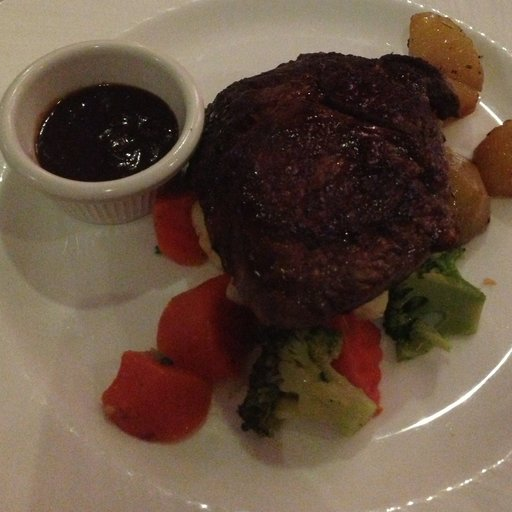

In [11]:
# 4 Open the selected image
img = Image.open(random_path)

# 5 print the metadata
print(f"Random image path: {random_path}")
print(f"Image class: {random_image_label}")
print(f"Image width: {img.width}; Image height: {img.height}")
img

In [12]:
### Try to visualize the image with matplotlib
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Class: steak | Image shape: (512, 512, 3) -> [height, widht, color channel]')

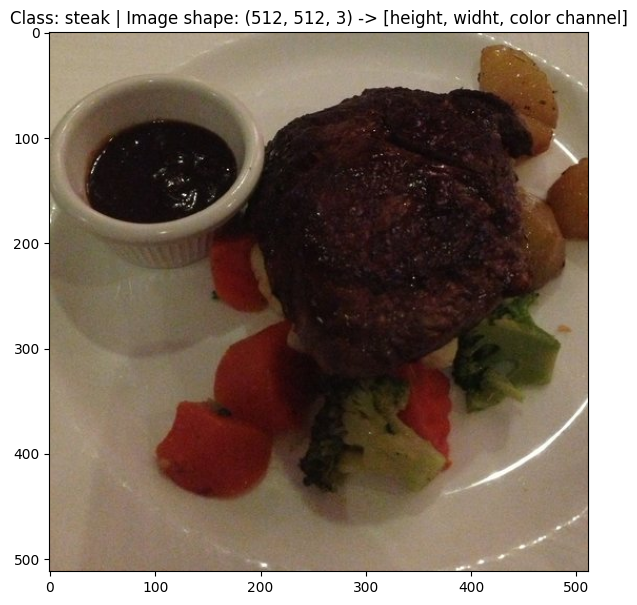

In [13]:
#turn the image as the array
img_as_array = np.array(img)

#plot the image with matpplot lib
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"Class: {random_image_label} | Image shape: {img_as_array.shape} -> [height, widht, color channel]")


## 3.Transforming image to tensor

Before we can using our image data with Pytorch:
1. Turn your target data into Tensors (in our case, numerical presentation of our images)
2. Turn it into a `torch.data.Dataset` and subsequently a `torch.utils.data.Dataloader`, we'll call these datasets and dataloader

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with torchvision.transforms

In [15]:
#Write a transform for image
data_transform = transforms.Compose([
    #Resize the image to 64x64
    transforms.Resize(size = (64,64)),
    #Flip the image randomly (0.5 chance) on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into the torch.tensor
    transforms.ToTensor()
])

In [16]:
transformed_img = data_transform(img)
transformed_img

tensor([[[0.6706, 0.6667, 0.6706,  ..., 0.6902, 0.6824, 0.6824],
         [0.6706, 0.6706, 0.6745,  ..., 0.6863, 0.6863, 0.6824],
         [0.6784, 0.6784, 0.6824,  ..., 0.6941, 0.6941, 0.6941],
         ...,
         [0.6196, 0.6078, 0.6039,  ..., 0.6235, 0.6275, 0.6196],
         [0.6078, 0.6078, 0.5961,  ..., 0.6157, 0.6235, 0.6196],
         [0.6039, 0.6039, 0.6039,  ..., 0.6157, 0.6157, 0.6118]],

        [[0.6118, 0.6078, 0.6078,  ..., 0.6235, 0.6275, 0.6235],
         [0.6118, 0.6078, 0.6118,  ..., 0.6275, 0.6353, 0.6314],
         [0.6196, 0.6196, 0.6235,  ..., 0.6392, 0.6392, 0.6392],
         ...,
         [0.5412, 0.5373, 0.5333,  ..., 0.5373, 0.5373, 0.5333],
         [0.5412, 0.5333, 0.5255,  ..., 0.5294, 0.5333, 0.5294],
         [0.5333, 0.5294, 0.5255,  ..., 0.5294, 0.5255, 0.5216]],

        [[0.5333, 0.5255, 0.5333,  ..., 0.5294, 0.5294, 0.5255],
         [0.5333, 0.5373, 0.5373,  ..., 0.5176, 0.5176, 0.5216],
         [0.5451, 0.5451, 0.5294,  ..., 0.5294, 0.5255, 0.

(-0.5, 63.5, 63.5, -0.5)

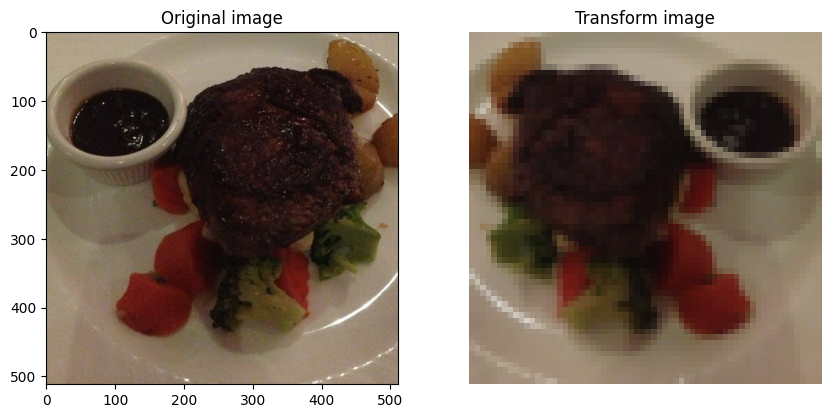

In [17]:
## Plot the image to compare
plt.figure(figsize =(10,7))
##plot the original image
plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(img_as_array)

#plot the transform image
plt.subplot(1,2,2)
plt.title('Transform image')
plt.imshow(transforms.ToPILImage()(transformed_img))

plt.axis(False)

In [18]:
## Writing a function to select random image from the image paths, perform transforming the image and plot them to see the different
def plot_transformed_image(image_paths: list,
                          transform,
                          n=3,
                          seed = None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k =n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax =plt.subplots(nrows =1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)
            
            #transform the image and plot the target
            transformed_image = transform(f).permute(1,2,0) #change the format of the transformed image to [H x W x C]
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
     

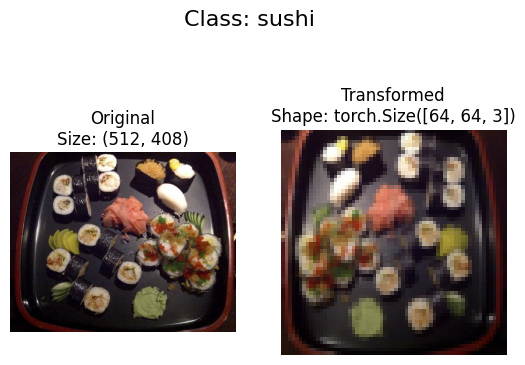

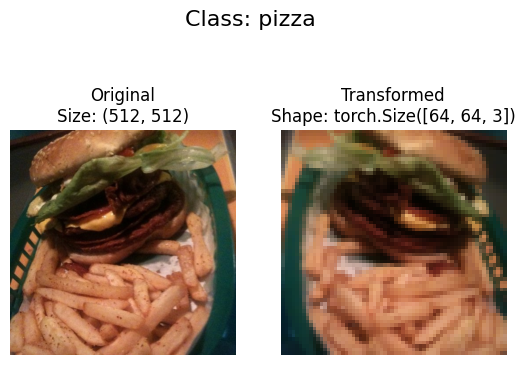

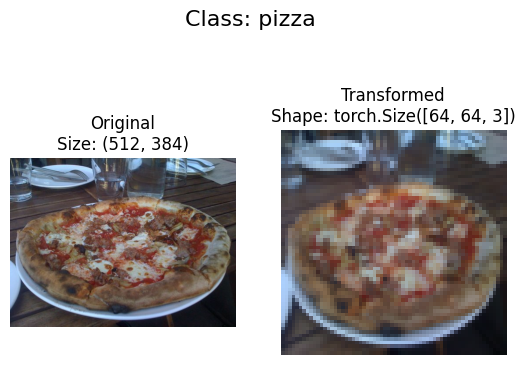

In [19]:

plot_transformed_image(image_paths = image_path_lst, transform =data_transform, n=3, seed=42)

## 3.2. Option1: Loading image using ImageFolder

In [20]:
#use ImageFolder to create dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_path,
                                transform = data_transform, #transform the data
                                target_transform = None) #transform the target/lable
test_data = datasets.ImageFolder(root = test_path,
                                transform = data_transform,
                                target_transform = None)

In [21]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: custom_data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: custom_data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [22]:
# Get class name as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [23]:
#Get class name as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [24]:
train_data.samples[0]

('custom_data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [25]:
#Inde on the train_data Datasets to get a single image and label
sample_img, sample_label = train_data[0][0], train_data[0][1]
print(f"Image tensor\n {sample_img}")
print(f"Image tensor shape: {sample_img.shape}")
print(f"Image tensor dtype: {sample_img.dtype}")
print(f"Label: {sample_label} = Class: {class_names[sample_label]}")
print(f"Label shape: {sample_label}")
print(f"Label type: {type(sample_label)}")

Image tensor
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.01

#### Ploting the sample image

Original shape: torch.Size([3, 64, 64]) -> [C x H x W]
New shape: torch.Size([64, 64, 3]) -> [H x W x C]


(-0.5, 63.5, 63.5, -0.5)

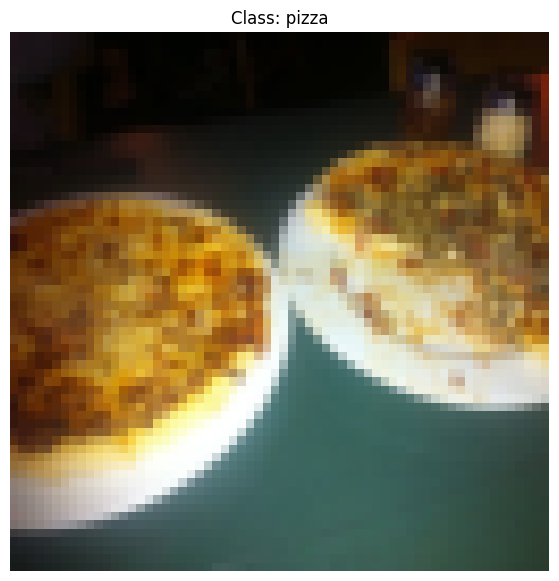

In [26]:
#rearrange the order dimension
img_permuted = sample_img.permute(1,2,0)
print(f"Original shape: {sample_img.shape} -> [C x H x W]")
print(f"New shape: {img_permuted.shape} -> [H x W x C]")
#plot the image after permute
plt.figure(figsize = (10,7))
plt.imshow(img_permuted)
plt.title(f"Class: {class_names[sample_label]}")
plt.axis("off")

## 4.1 Turning the image into the DataLoader

A `DataLoader`is going to help us turn our `Dataset`'s into iterables and we can customise the `batch_size` of our model can see `batch_size` images at a time

In [27]:
## Turn train and test to DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                             batch_size =BATCH_SIZE,
                             num_workers = 2,
                             shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            num_workers =2,
                            shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x274efffb9a0>,
 <torch.utils.data.dataloader.DataLoader at 0x274efffb400>)

In [28]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [29]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_szie, color_channel, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_szie, color_channel, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading Image Data with Custome Dataset

1. Want to be able to load images from files
2. Want to be able to get class name from the Dataset
3. Want to be able to get classes as dictionary from the Dataset

Pros:
    * Can create a `Dataset` out of almost anything
    * Not limited to Pytorch pre-built `Dataset` functions
Cons:
    * Even though you could create `Dataset` out of almost anything, it's doesn't mean it will work
    * Using custom `Dataset` often result writing more code, which could be prone to errors or performance issuses...

In [30]:
import os
import pathlib 
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
import typing

### 5.1 Create a helper functions to get class name

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format)
2. Raise an errors if the class names aren't found (if this happend, there might be something wrong with the directory structure)
3. Turn the class names into the list and dict and return them.

In [31]:
#setup path for target diretctory
target_dir = train_path
print(f"Target dir: {target_dir}")

print(list(os.scandir(target_dir)))

#Get the class names from the target dir
class_name_found = sorted([entry.name for entry in list(os.scandir(target_dir))])

Target dir: custom_data\pizza_steak_sushi\train
[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]


In [32]:
###
def find_classes(dictionary: str) ->Tuple[List[str], Dict[str, int]]:
    """Find the classes folder name in the targer directory"""
    #1. get the class names by scanning the target directory
    classes = sorted([entry.name for entry in list(os.scandir(dictionary)) if entry.is_dir()])
    
    #2.Raise an error if class name could not be found
    if not classes:
        raise FileNotFoundError(f"Coundn't find any classes in {directory}... Please check the file structure")
        
    #3. Create a dictionary of index label
    class_to_idx = {class_name :i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [33]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` replicate the `ImageFolder`

To create our custom Dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data
3. Create serveral attributes:
 * paths - paths of our images
 * transform - the transform we'd like to use
 * classes - a list of the target classes
 * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_image()`, this function will open images
5. Overwrite the `__len__()` method to retrun the length of our dataset
6. Overwrite the `__getitem__()` method to return the given sample when passed an index

In [34]:
#0. Write a custom dataset
from torch.utils.data import Dataset

#1. Subclass torhc.utils.data.Dataset
class ImageFolderCustom(Dataset):
#2. initialize the custom dataset
    def __init__(self, targ_dir: str, transform = None):
    #3. create class attribute
        #get all the image path
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        # transform
        self.transform = transform
        #get the class and class idx
        self.classes, self.class_to_idx = find_classes(targ_dir)
#4. Create function to load images:
    def load_image(self, index:int) -> Image.Image:
        """Open an image file path and return it"""
        image_path = self.paths[index]
        return Image.open(image_path)
#5. Overwrite __len__()
    def __len__(self) -> int:
        """Return the total number of samples"""
        return len(self.paths)
#6. Overwrite the __getitems__() to return the particule image
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """Return one sample of data and label (x,y)"""
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]
        #transform if nessesary
        if self.transform:
            return self.transform(img), class_idx
        #return unstransform img and label
        return img, class_idx

In [35]:
transform = None
custom_imagefolder = ImageFolderCustom(targ_dir = target_dir,
                                      transform = transform)

In [36]:
class_names = custom_imagefolder.classes
img, class_idx = custom_imagefolder.__getitem__(1)

In [37]:
class_names

['pizza', 'steak', 'sushi']

#### Create a transform

In [38]:
from torchvision import transforms
train_transform = transforms.Compose([
                                        transforms.Resize(size = (64,64)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.ToTensor()
])

test_transform = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.RandomVerticalFlip(p=0.5),
                                        transforms.ToTensor()
])

#### create a custom loader for train and test

In [39]:
train_dir = train_path
test_dir = test_path
print(f"train path: {train_dir}")
print(f"test path: {test_dir}")

train path: custom_data\pizza_steak_sushi\train
test path: custom_data\pizza_steak_sushi\test


In [40]:
train_custom_dataset = ImageFolderCustom(targ_dir = train_dir,
                                           transform = train_transform)

test_custom_dataset = ImageFolderCustom(targ_dir = test_dir,
                                          transform = test_transform)
train_custom_dataset,test_custom_dataset

(<__main__.ImageFolderCustom at 0x274f005fd30>,
 <__main__.ImageFolderCustom at 0x274f005f730>)

In [41]:
print(f"Compare train data len:\n {len(train_data),len(train_custom_dataset)}")
print(f"Compare test data len:\n {len(test_data), len(test_custom_dataset)}")

Compare train data len:
 (225, 225)
Compare test data len:
 (75, 75)


In [42]:
train_sample_img, train_sample_label = train_custom_dataset.__getitem__(2)
train_sample_img

tensor([[[0.0392, 0.0392, 0.0431,  ..., 0.2275, 0.2314, 0.2314],
         [0.0392, 0.0392, 0.0392,  ..., 0.2196, 0.2235, 0.2196],
         [0.0392, 0.0392, 0.0392,  ..., 0.2078, 0.2118, 0.2118],
         ...,
         [0.8118, 0.8078, 0.7961,  ..., 0.5373, 0.4863, 0.4039],
         [0.5176, 0.6157, 0.6392,  ..., 0.2902, 0.2000, 0.1608],
         [0.2863, 0.3333, 0.3686,  ..., 0.1216, 0.0902, 0.0784]],

        [[0.0353, 0.0353, 0.0392,  ..., 0.1922, 0.1922, 0.1922],
         [0.0353, 0.0353, 0.0353,  ..., 0.1804, 0.1843, 0.1843],
         [0.0353, 0.0353, 0.0353,  ..., 0.1765, 0.1725, 0.1765],
         ...,
         [0.5804, 0.5373, 0.5294,  ..., 0.4588, 0.4000, 0.3176],
         [0.2941, 0.3765, 0.3882,  ..., 0.2196, 0.1373, 0.1098],
         [0.1529, 0.1608, 0.1686,  ..., 0.0863, 0.0706, 0.0588]],

        [[0.0157, 0.0157, 0.0196,  ..., 0.1961, 0.2000, 0.2078],
         [0.0157, 0.0157, 0.0157,  ..., 0.1843, 0.1843, 0.1882],
         [0.0157, 0.0157, 0.0196,  ..., 0.1686, 0.1686, 0.

In [43]:
train_custom_dataset.__getitem__(1)[0].shape

torch.Size([3, 64, 64])

### 5.3 Create a function to displays random images

1. Take in a `Dataset` and a number of other parameters such as class name and how many images to visualize.
2. To pervent the display getting out of hand, let's cap the number of displaying images to 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup the matplotlib plot.
6. Look through the random samples images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib(HWC)

In [44]:
import random
import matplotlib.pyplot as plt
#1. Create a function take in the dataset
def display_random_image(dataset: torch.utils.data.Dataset,
                        classes: List[str]= None,
                        n: int =10,
                        display_shape: bool = True,
                        seed: int = None):
    #2. adjust the number of image if n is to hight:
    if n > 10:
        n =10
        display_shape =False
        print("For display purposes, n shoudn't be larger than 10, setting n to 10 and remove shape display.")
    
    #3. set the random seed
    if seed:
        random.seed(seed)
    
    #4. get a list of random sample indexes
    idx_lst = random.sample(range(len(dataset)), k=n)
    
    #5. Setup the matplotlib
    rows = 2
    cols = 5
    fig = plt.figure(figsize=(16,9))
    
    #6. look through the random samples images and plot in matplotlib
    for i, sample in enumerate(idx_lst):
        #get the image and label from the dataset
        img, label = dataset[sample][0], dataset[sample][1]
        #7. get the dimension of the image line up with matplotlib ([CxHxW] -> [HxWxC])
        img = img.permute(2,1,0)
        #plot the image
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(img)
        #show the titile as class if classes passed
        if classes:
            title = f"Class: {classes[label]}"
            #display the shape of the image in the dataset
            if display_shape:
                title =title + f"\nShape: {img.shape}"
        else:
            title = ""
        plt.title(title, fontsize =12)
        plt.axis(False)
    plt.show()

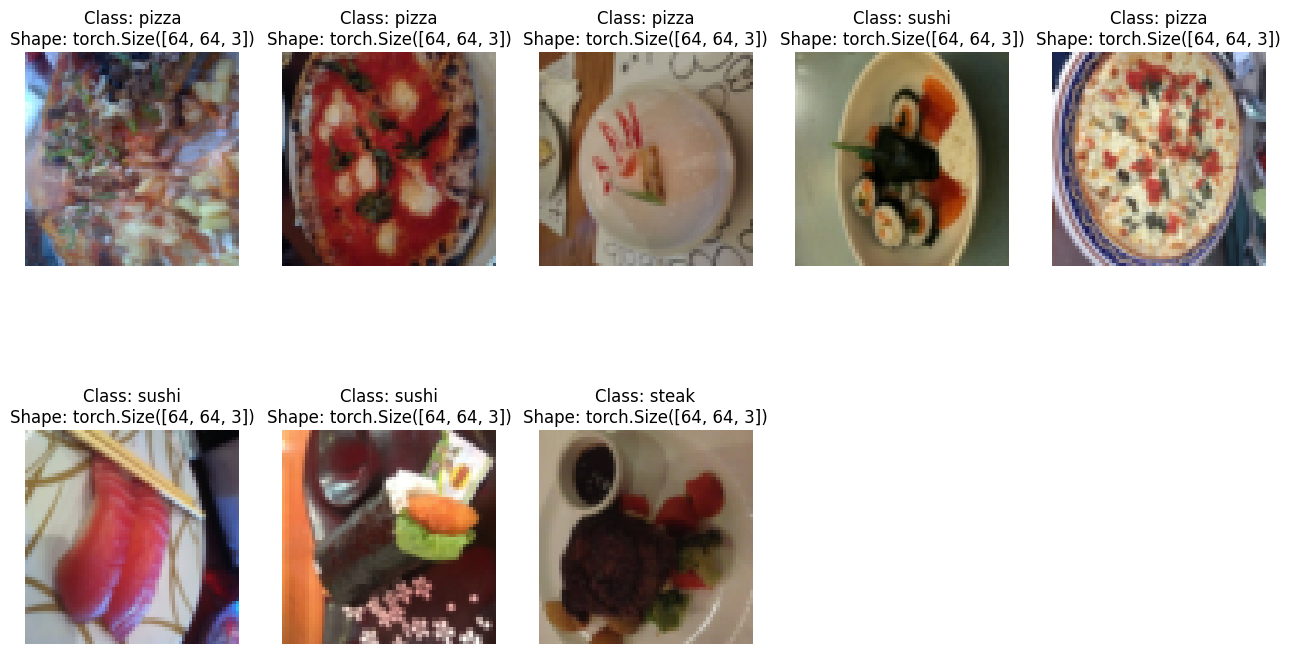

In [45]:
display_random_image(dataset = train_custom_dataset,
                    classes = train_custom_dataset.classes,
                    n = 8,
                    display_shape = True,
                    seed= None)

## 5 Turn dataset to the `DataLoader`

In [46]:
BATCH_SIZE = 32
train_custom_dataloader = DataLoader(dataset = train_custom_dataset,
                                    batch_size =BATCH_SIZE,
                                    num_workers = 0,
                                     shuffle = True)
test_custom_dataloader = DataLoader(dataset = test_custom_dataset,
                                   batch_size = BATCH_SIZE,
                                   num_workers = 0,
                                   shuffle = False)

train_custom_dataloader, test_custom_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x274f03b5400>,
 <torch.utils.data.dataloader.DataLoader at 0x274f03b51f0>)

In [47]:
# Get sample images and label from Dataloader
img_custom, label_custom = next(iter(train_custom_dataloader))
#print it out
print(img_custom.shape, label_custom.shape)

torch.Size([32, 3, 64, 64]) torch.Size([32])


## 6.Other form of transform (data augmentation)

Data augmentation is the process of artificially adding diversity to your training data.

In the case of image data, this may mean applying various image transformation to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.

Let's take a look at one particular type of data augmentation used to train Pytorch vision models to state of the art levels ...

In [48]:
# Let's look at trivailaugment
from torchvision import transforms

train_transform = transforms.Compose([
                                        transforms.Resize(size = (224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                        transforms.ToTensor()
])

test_trainsform = transforms.Compose([
                                        transforms.Resize(size= (224,224)),
                                        transforms.ToTensor()
])

In [49]:
##get all images paths
image_path_lst = list(IMAGE_PATH.glob("*/*/*.jpg"))
image_path_lst[:10]

[WindowsPath('custom_data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('custom_data/pizza_steak_sushi/test/pizza/2124579.jpg')]

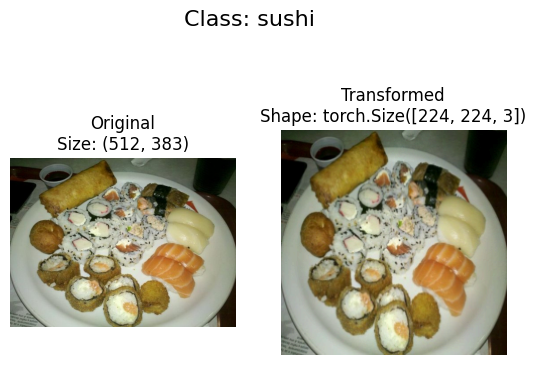

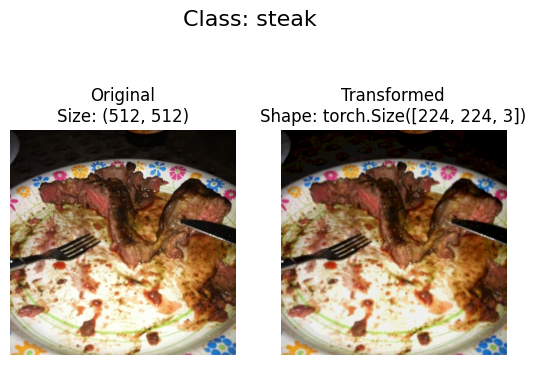

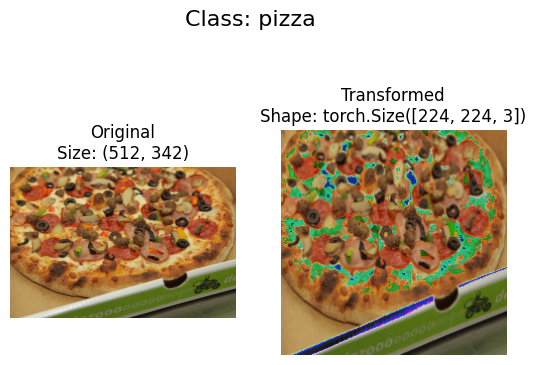

In [50]:
##Plot the transform image
plot_transformed_image(image_paths = image_path_lst,
                      transform = train_transform,
                      n=3,
                      seed = None)

## 7.Build a baseline model

### Model 0: Build a TinyVGG for our data augment

In [51]:
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from pathlib import Path
import os
import matplotlib.pyplot as plt

### 7.1 Create transform and loading data for model 0

In [52]:
#Create a transform
simple_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [53]:
#load the data from folder to data set
DATA_PATH = Path('custom_data')
IMAGE_PATH = DATA_PATH/'pizza_steak_sushi'
train_dir = IMAGE_PATH/'train'
test_dir = IMAGE_PATH/'test'

#create train and test dataset

train_dataset_simple = ImageFolderCustom(targ_dir = train_dir, 
                                 transform = simple_transform)

test_dataset_simple = ImageFolderCustom(targ_dir = test_dir,
                                transform = simple_transform)

train_dataset_simple, test_dataset_simple

(<__main__.ImageFolderCustom at 0x274f0b21c40>,
 <__main__.ImageFolderCustom at 0x274f0b21f10>)

In [54]:
BATCH_SIZE = 32
#create dataloader
train_dataloader_simple = DataLoader(train_dataset_simple,
                             shuffle = True,
                             batch_size =BATCH_SIZE)
test_dataloader_simple = DataLoader(test_dataset_simple,
                            shuffle =False,
                            batch_size =BATCH_SIZE)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x274f0b2c9a0>,
 <torch.utils.data.dataloader.DataLoader at 0x274f0b2ca30>)

### 7.2 Build baseline mode (model 0)

In [55]:
class TinyVGGV0(nn.Module):
    def __init__(self, input_shape, 
                 output_shape, 
                 hidden_units = 10, 
                 transform = None):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_units,
                     kernel_size =3,
                     stride = 1,
                     padding = 1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size =3,
                     stride =1,
                     padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size =2,
                        stride = 2) #by default stride values is the same as kernek _size
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                     out_channels = hidden_units,
                     kernel_size =3,
                     stride =1,
                     padding =1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*16*16,
                     out_features = output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
#         print(x.shape)
        x = self.conv_block2(x)
#         print(x.shape)
        return self.classifier(x)
#         return self.classifier(self.conv_block2(self.conv_block1(x)))

In [56]:
#device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [57]:
INPUT_SHAPE = 3
OUTPUT_SHAPE = 3

model_0 = TinyVGGV0(input_shape = INPUT_SHAPE,
                   output_shape = OUTPUT_SHAPE).to(device)
model_0

TinyVGGV0(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [58]:
#create a dummy data to test the model
dummy_image, dummy_label = next(iter(train_dataloader_simple))
dummy_image =dummy_image.to(device)
dummy_image.shape

torch.Size([32, 3, 64, 64])

In [59]:
#forward pass
dummy_pred = model_0(dummy_image)

In [60]:
dummy_pred

tensor([[-0.0034,  0.0048,  0.0170],
        [-0.0130, -0.0007,  0.0152],
        [-0.0206, -0.0063,  0.0138],
        [-0.0059,  0.0003,  0.0131],
        [-0.0196, -0.0089,  0.0073],
        [-0.0117, -0.0053,  0.0094],
        [-0.0064, -0.0109,  0.0099],
        [-0.0111, -0.0011,  0.0101],
        [-0.0263, -0.0065,  0.0310],
        [-0.0123,  0.0023,  0.0297],
        [-0.0116,  0.0022,  0.0294],
        [-0.0150,  0.0050,  0.0397],
        [-0.0156, -0.0081,  0.0189],
        [-0.0106,  0.0016,  0.0094],
        [-0.0186,  0.0013,  0.0224],
        [-0.0140, -0.0251,  0.0128],
        [-0.0174,  0.0161,  0.0211],
        [-0.0172, -0.0207,  0.0388],
        [-0.0185,  0.0031,  0.0230],
        [-0.0109, -0.0031,  0.0148],
        [-0.0116, -0.0068,  0.0182],
        [-0.0199, -0.0060,  0.0181],
        [-0.0051, -0.0122,  0.0141],
        [-0.0317,  0.0081,  0.0152],
        [-0.0142, -0.0044,  0.0207],
        [-0.0159, -0.0089,  0.0142],
        [-0.0136, -0.0036,  0.0014],
 

### 7.4 Using torchinfo to get an idea of the shapes going through our model

In [61]:
#install torchinfo and import if it aldready install
try:
    #try import first
    import torchinfo
except:
    #install 
    !pip install torchinfo

from torchinfo import summary
summary(model_0, input_size = [1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGV0                                [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-8                    [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 3]                    --
│    └─Flatten: 2-9                      [1, 2560]                 --
│    └─Linea

### 7.5 Create training and testing function

* `train_step()` -take in a model, dataloader and trains the model on the dataloader
* `test_step()` - take in a model and dataloader and evaluates the models on the dataloader

In [62]:
from tqdm import tqdm

def train_step(model,
              dataloader,
              loss_fn,
              optimizer,
              device = 'cpu'):
    model.train()
    train_loss, train_acc = 0,0
    for batch_img, batch_label in dataloader:
        batch_img = batch_img.to(device)
        batch_label= batch_label.to(device)

        #1. forward pass
        pred_logits = model(batch_img)
        pred_label = torch.softmax(pred_logits, dim = 1).argmax(dim = 1)

        #2. calculate loss and accuracy
        loss = loss_fn(pred_logits, batch_label)
        acc = (pred_label == batch_label).sum().item()/len(pred_label)
        # accumulate the loss and accuracy
        train_loss += loss.item()
        train_acc += acc

        #3. optimizer zero grad
        optimizer.zero_grad()

        #4. loss backward
        loss.backward()

        #5. optimizer step
        optimizer.step()
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [63]:
def test_step(model,
              dataloader,
             loss_fn,
             device = 'cpu'):
    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for batch_image, batch_label in tqdm(dataloader, desc = "Testing..."):
            batch_image = batch_image.to(device)
            batch_label = batch_label.to(device)
            
            #1. forward pass
            pred_logits = model(batch_image)
            pred_label = torch.softmax(pred_logits, dim =1).argmax(dim =1)
            
            #2. calulate the loss and accuracy
            loss = loss_fn(pred_logits, batch_label)
            acc = (pred_label == batch_label).sum().item()
            #accumalate the loss and acc
            test_loss += loss.item()
            test_acc += acc/len(pred_label)
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    return test_loss, test_acc

### 7.6 Create a `train()` function to combine `train_Step()` and `eval_step()`

In [64]:
def train(model,
          loss_fn,
          optimizer,
          train_dataloader,
          test_dataloader,
          epochs = 5,
          device = 'cpu'
          ):
    result_dict = {"train_loss":[],
                  "train_acc": [],
                  "test_loss": [],
                  "test_acc": []}
    for epoch in tqdm(range(epochs)):
        ### TRAINING PHARSE
        train_loss, train_acc = train_step(model = model,
          dataloader = train_dataloader,
          loss_fn = loss_fn,
          optimizer = optimizer,
          device = device)
        ### TESTING PHARSE
        test_loss, test_acc = test_step(model = model,
                      dataloader = test_dataloader,
                     loss_fn = loss_fn,
                     device = device)
        ### print what happening
        print(f"Epoch: {epoch+1} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test acc: {test_acc}")
        
        ##update the result list
        result_dict['train_loss'].append(train_loss)
        result_dict['train_acc'].append(train_acc)
        result_dict['test_loss'].append(test_loss)
        result_dict['test_acc'].append(test_acc)
        
    return result_dict

### 7.7 train and evaluate model 0

In [65]:
from timeit import default_timer as timer

In [66]:
EPOCHS = 10
INPUT_SHAPE = 3
OUTPUT_SHAPE = len(train_dataset_simple.classes)
HIDDEN_UNITS = 10
torch.cuda.manual_seed(42)
##init the model
model_0 = TinyVGGV0(input_shape = INPUT_SHAPE,
                   output_shape = OUTPUT_SHAPE,
                   hidden_units = HIDDEN_UNITS).to(device)

In [67]:
from torchmetrics import Accuracy
#define loss function
loss_fn = torch.nn.CrossEntropyLoss()
#define optimizer function
optimizer = torch.optim.Adam(params = model_0.parameters(),
                           lr = 0.05)
#define accuracy function
accuracy_fn = Accuracy(task='multiclass', num_classes = len(class_names)).to(device)

In [68]:
#set timer start
start_timer = timer()
## create training 
model_0_result = train(model= model_0,
          train_dataloader = train_dataloader_simple,
          test_dataloader = test_dataloader_simple,
          loss_fn = loss_fn,
          epochs = EPOCHS,
          optimizer = optimizer,
          device = device)
#end the timer
end_timer = timer()
print(f"Trainning time: {start_timer - end_timer:.3f} seconds")

 10%|██████████▏                                                                                           | 1/10 [00:04<00:38,  4.23s/it]

Epoch: 1 | Train loss: 4.6905097514390945 | Train acc: 0.3125 | Test loss: 1.115857442220052 | Test acc: 0.19791666666666666



 20%|████████████████████▍                                                                                 | 2/10 [00:05<00:17,  2.22s/it]

Epoch: 2 | Train loss: 1.1100225299596786 | Train acc: 0.29296875 | Test loss: 1.1208385626475017 | Test acc: 0.19791666666666666



 30%|██████████████████████████████▌                                                                       | 3/10 [00:05<00:11,  1.58s/it]

Epoch: 3 | Train loss: 1.0979806035757065 | Train acc: 0.31640625 | Test loss: 1.0911309321721394 | Test acc: 0.2604166666666667



 40%|████████████████████████████████████████▊                                                             | 4/10 [00:06<00:07,  1.27s/it]

Epoch: 4 | Train loss: 1.1028941422700882 | Train acc: 0.28515625 | Test loss: 1.0662010709444683 | Test acc: 0.5416666666666666



 50%|███████████████████████████████████████████████████                                                   | 5/10 [00:07<00:05,  1.15s/it]

Epoch: 5 | Train loss: 1.0964110642671585 | Train acc: 0.28125 | Test loss: 1.0754783153533936 | Test acc: 0.2604166666666667



 60%|█████████████████████████████████████████████████████████████▏                                        | 6/10 [00:08<00:04,  1.06s/it]

Epoch: 6 | Train loss: 1.09669728577137 | Train acc: 0.3046875 | Test loss: 1.0705212752024333 | Test acc: 0.5416666666666666



 70%|███████████████████████████████████████████████████████████████████████▍                              | 7/10 [00:09<00:02,  1.01it/s]

Epoch: 7 | Train loss: 1.1264649480581284 | Train acc: 0.28125 | Test loss: 1.0594646334648132 | Test acc: 0.5416666666666666



 80%|█████████████████████████████████████████████████████████████████████████████████▌                    | 8/10 [00:10<00:01,  1.05it/s]

Epoch: 8 | Train loss: 1.1114819943904877 | Train acc: 0.28125 | Test loss: 1.0867754618326824 | Test acc: 0.5416666666666666



 90%|███████████████████████████████████████████████████████████████████████████████████████████▊          | 9/10 [00:11<00:00,  1.08it/s]

Epoch: 9 | Train loss: 1.1078198552131653 | Train acc: 0.28125 | Test loss: 1.1136999527613323 | Test acc: 0.2604166666666667



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.20s/it]

Epoch: 10 | Train loss: 1.1016940921545029 | Train acc: 0.3046875 | Test loss: 1.1033247311909993 | Test acc: 0.2604166666666667
Trainning time: -12.003 seconds


In [69]:
model_0_result

{'train_loss': [4.6905097514390945,
  1.1100225299596786,
  1.0979806035757065,
  1.1028941422700882,
  1.0964110642671585,
  1.09669728577137,
  1.1264649480581284,
  1.1114819943904877,
  1.1078198552131653,
  1.1016940921545029],
 'train_acc': [0.3125,
  0.29296875,
  0.31640625,
  0.28515625,
  0.28125,
  0.3046875,
  0.28125,
  0.28125,
  0.28125,
  0.3046875],
 'test_loss': [1.115857442220052,
  1.1208385626475017,
  1.0911309321721394,
  1.0662010709444683,
  1.0754783153533936,
  1.0705212752024333,
  1.0594646334648132,
  1.0867754618326824,
  1.1136999527613323,
  1.1033247311909993],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.5416666666666666,
  0.2604166666666667,
  0.5416666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.2604166666666667,
  0.2604166666666667]}

### 7.8 Plot the loss curves of the model 0

A **loss curve** is a way of tracking the model's overtime

In [70]:
#get the model _0_result key
model_0_result.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [71]:
def plot_loss_curves(result: Dict[str, List[float]]):
    """Plot trainning curves of a results dictionary"""
    
    #Get the loss values of the results dictionary (trainning and test)
    loss = result['train_loss']
    val_loss = result['test_loss']
    #Get the accuracy values of the results dictionary (trainning and test)
    acc = result['train_acc']
    val_acc = result['test_acc']
    #get the number of epochs
    epochs = range(len(result['train_loss']))
    
    #setup a plot
    plt.figure(figsize=(16,9))
    #plot the loss
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label = 'Train loss')
    plt.plot(epochs, val_loss, label = 'Test loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    #plot the accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, label='Train acc')
    plt.plot(epochs, val_acc, label = 'Test acc')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.show()

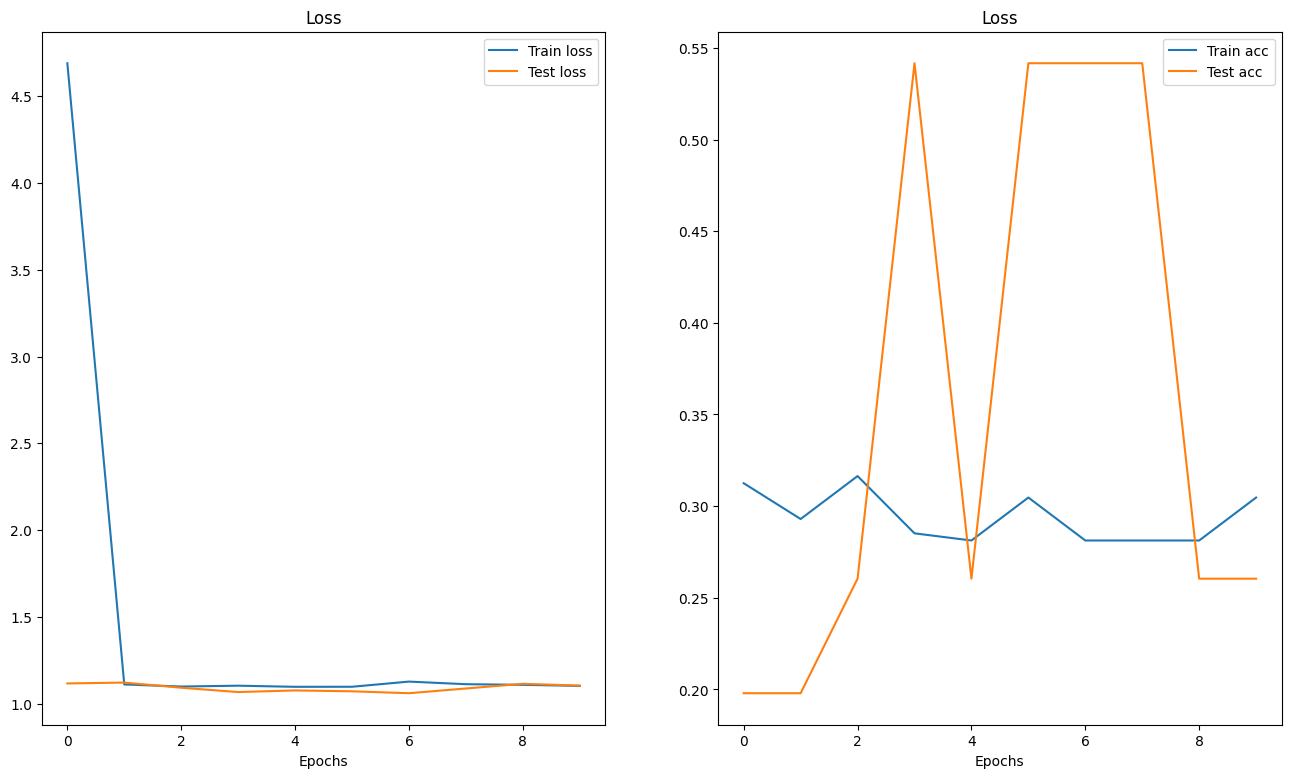

In [72]:
plot_loss_curves(model_0_result)

### 8. Overfitting and Underfitting

By looking the trainning curves loss, you can guess the model performance by looking the loss the training and testing loss curves. 
* If the testing loss under the training loss - called `Underfitting`. This mean the model is learning poorly and can not perform well even on the trainig dataset. To deal with `Underfitting`, we coud:
    * Add more layer/hidden units to model: The model may not have enough capability to *learn* the required patterns/weights of the data to be predictive.
    * Tweak the learning rate: Prehaps the model's learning rate is too high to begin with. And it's try to update its weight each epoch too much, it turn not learning anything.
    * Train for longer: Sometimes a model just need more time to learn representation of data.
    * Use transfer learning: Take a model's pre-trained patterns from one problems and tweak them to suit your problems.
    * Use less regularization: Maybe the model is underfitting b/c you're trying to prevent overfitting too much. Holiding back on regurlarization techniques can help your model fit the data betters.
    
* If the testing loss over the training loss - called `Overfitting`. This mean the model is learning too well on the train dataset but not generalize and perform poorly on the test dataset. To deal with `Overfitting`, we could:
    * Get more data: Give model chances to learn patterns between samples.
    * Data augmentation: Increase the diversity of your training dataset without collecting more data.
    * Better data: Remove poor samples or adding more better samples (garbage in garbage out).
    * Use transfer learning: Take a model's pre-trained patterns from one problems and tweak them to suit your problems.
    * Simplify the model: If the current model's is already overfiting means that the model may be too complicate. This mean is learn the patterns in the data to well so that it can't be able to generallize the unseen data.
    * Use learning rate decay: Slowly decrease the learning rate as the model train.
    * Use early stopping: Stop training the model before it begin to overfiting.

## 9. Create an new model with better performance

### 9.1 model_1: TinyVGG with data augmentation

#### create data transform with augmentation

In [73]:
from torchvision import transforms
train_transform_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins= 31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

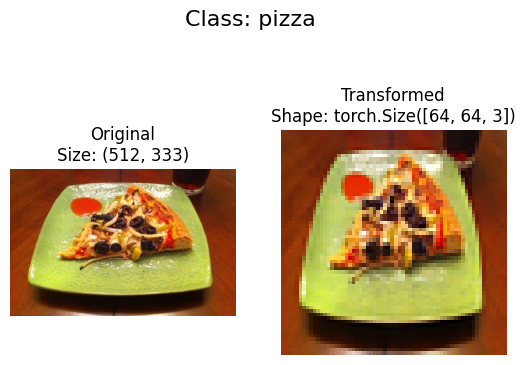

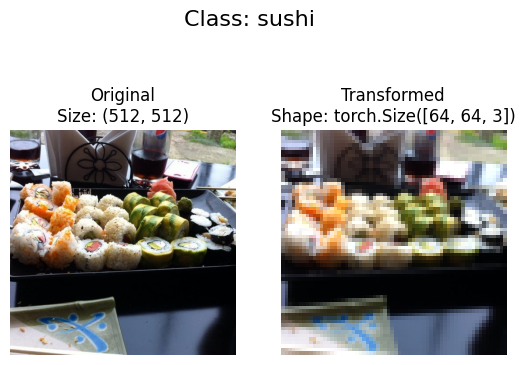

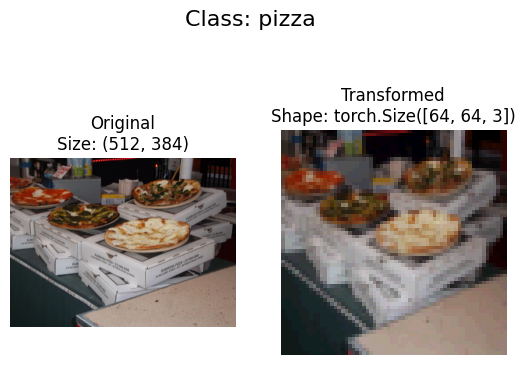

In [74]:
##Plot the transform image
plot_transformed_image(image_paths = image_path_lst,
                      transform = train_transform_augment,
                      n=3,
                      seed = None)

#### Create a `Dataset()` and `DataLoader()` with data augmentation

In [75]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
###Create a dataset
train_dataset_augment = ImageFolder(root =train_dir, transform = train_transform_augment, target_transform = None)
test_dataset_simple =  ImageFolder(root =test_dir, transform = test_transform_simple, target_transform = None)
train_dataset_augment, test_dataset_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: custom_data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: custom_data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [76]:
import os
##Create a dataloader
BATCH_SIZE =32
NUM_WORKER = 0

torch.manual_seed(42)
train_dataloader_augment = DataLoader(dataset = train_dataset_augment,
                                     batch_size =BATCH_SIZE,
                                     shuffle = True,
                                     num_workers = NUM_WORKER)
test_dataloader_simple = DataLoader(dataset = test_dataset_simple,
                                    batch_size =BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKER)
train_dataloader_augment, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x274f0173f10>,
 <torch.utils.data.dataloader.DataLoader at 0x274f0173eb0>)

#### Construct and train model_1. Using TinyVGGV0 architechture

In [77]:
#create model_1 and send to device
model_1 = TinyVGGV0(input_shape = 3,
                   output_shape =3,
                   hidden_units = 20).to(device)


In [78]:
#set the loss_fn and optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                           lr = 0.05)

In [79]:
EPOCHS = 10
#set timer start
start_timer = timer()
## create training 
model_1_result = train(model= model_1,
          train_dataloader = train_dataloader_augment,
          test_dataloader = test_dataloader_simple,
          loss_fn = loss_fn,
          epochs = EPOCHS,
          optimizer = optimizer,
          device = device)
#end the timer
end_timer = timer()
print(f"Trainning time: {start_timer - end_timer:.3f} seconds")

 10%|██████████▏                                                                                           | 1/10 [00:00<00:08,  1.03it/s]

Epoch: 1 | Train loss: 1.1072119325399399 | Train acc: 0.27734375 | Test loss: 1.2165354092915852 | Test acc: 0.19791666666666666



 20%|████████████████████▍                                                                                 | 2/10 [00:01<00:07,  1.07it/s]

Epoch: 2 | Train loss: 1.1168721318244934 | Train acc: 0.29296875 | Test loss: 1.0877706209818523 | Test acc: 0.5416666666666666



 30%|██████████████████████████████▌                                                                       | 3/10 [00:02<00:06,  1.08it/s]

Epoch: 3 | Train loss: 1.099601998925209 | Train acc: 0.27734375 | Test loss: 1.0988128980000813 | Test acc: 0.2604166666666667



 40%|████████████████████████████████████████▊                                                             | 4/10 [00:03<00:05,  1.08it/s]

Epoch: 4 | Train loss: 1.0994393527507782 | Train acc: 0.3046875 | Test loss: 1.082827885945638 | Test acc: 0.5113636363636364



 50%|███████████████████████████████████████████████████                                                   | 5/10 [00:04<00:04,  1.10it/s]

Epoch: 5 | Train loss: 1.0923402905464172 | Train acc: 0.4375 | Test loss: 1.0652273495992024 | Test acc: 0.5416666666666666



 60%|█████████████████████████████████████████████████████████████▏                                        | 6/10 [00:05<00:03,  1.12it/s]

Epoch: 6 | Train loss: 1.0872616171836853 | Train acc: 0.41015625 | Test loss: 1.0512425700823467 | Test acc: 0.5416666666666666



 70%|███████████████████████████████████████████████████████████████████████▍                              | 7/10 [00:06<00:02,  1.13it/s]

Epoch: 7 | Train loss: 1.0859948843717575 | Train acc: 0.28125 | Test loss: 1.1312355597813923 | Test acc: 0.2604166666666667



 80%|█████████████████████████████████████████████████████████████████████████████████▌                    | 8/10 [00:07<00:01,  1.13it/s]

Epoch: 8 | Train loss: 1.1090054363012314 | Train acc: 0.31640625 | Test loss: 1.1066274245580037 | Test acc: 0.19791666666666666



 90%|███████████████████████████████████████████████████████████████████████████████████████████▊          | 9/10 [00:08<00:00,  1.13it/s]

Epoch: 9 | Train loss: 1.0843252688646317 | Train acc: 0.40234375 | Test loss: 1.0410652955373128 | Test acc: 0.5729166666666666



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.11it/s]

Epoch: 10 | Train loss: 1.0525177046656609 | Train acc: 0.46875 | Test loss: 0.9755915006001791 | Test acc: 0.5520833333333334
Trainning time: -9.019 seconds


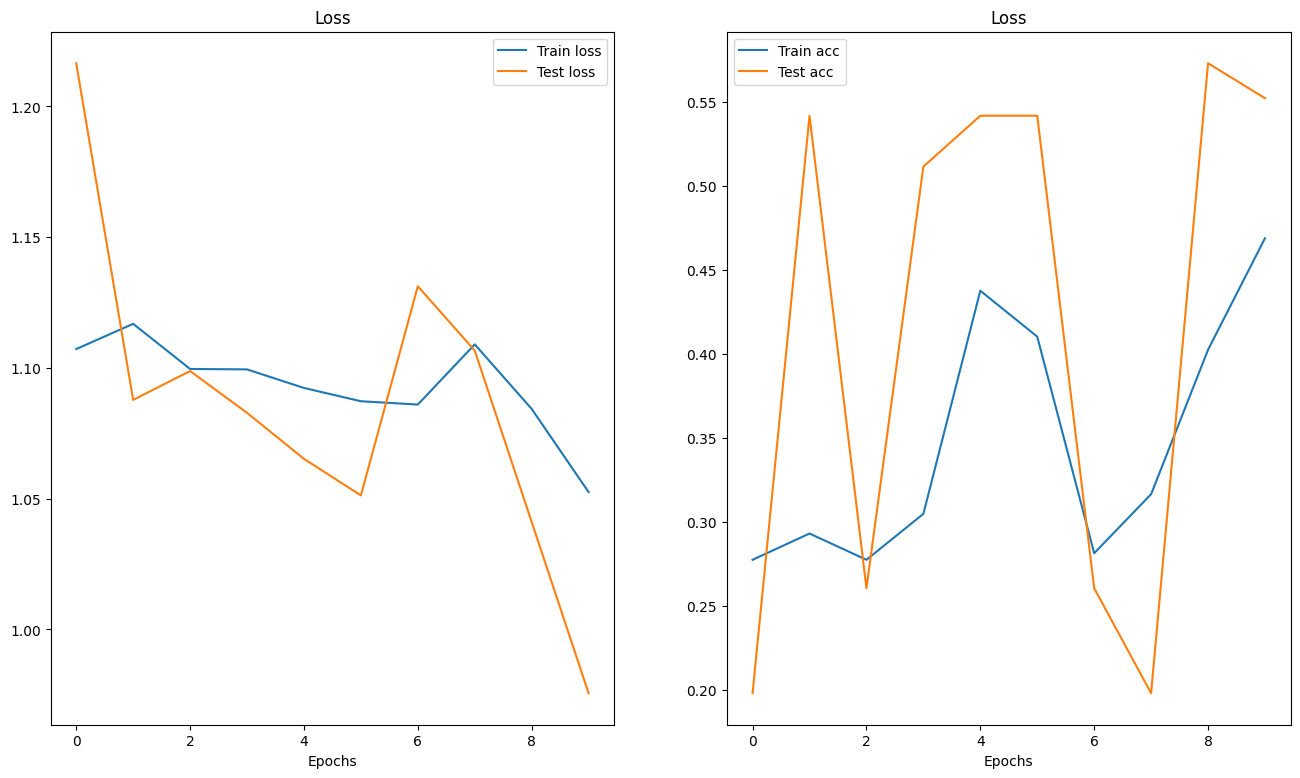

In [80]:
#Plot the loss and accuracy curves
plot_loss_curves(model_1_result)

## 10.Compare model results

After evaluating our modelling experiments on their owns, it's important to compare them to each other.

There's a few different ways to do this:
1. Hard code (what we're doing)
2. Pytorch + TensorBoard
3. Weight & Biases Library
4. MLFlow

In [81]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_result)
model_1_df = pd.DataFrame(model_1_result)

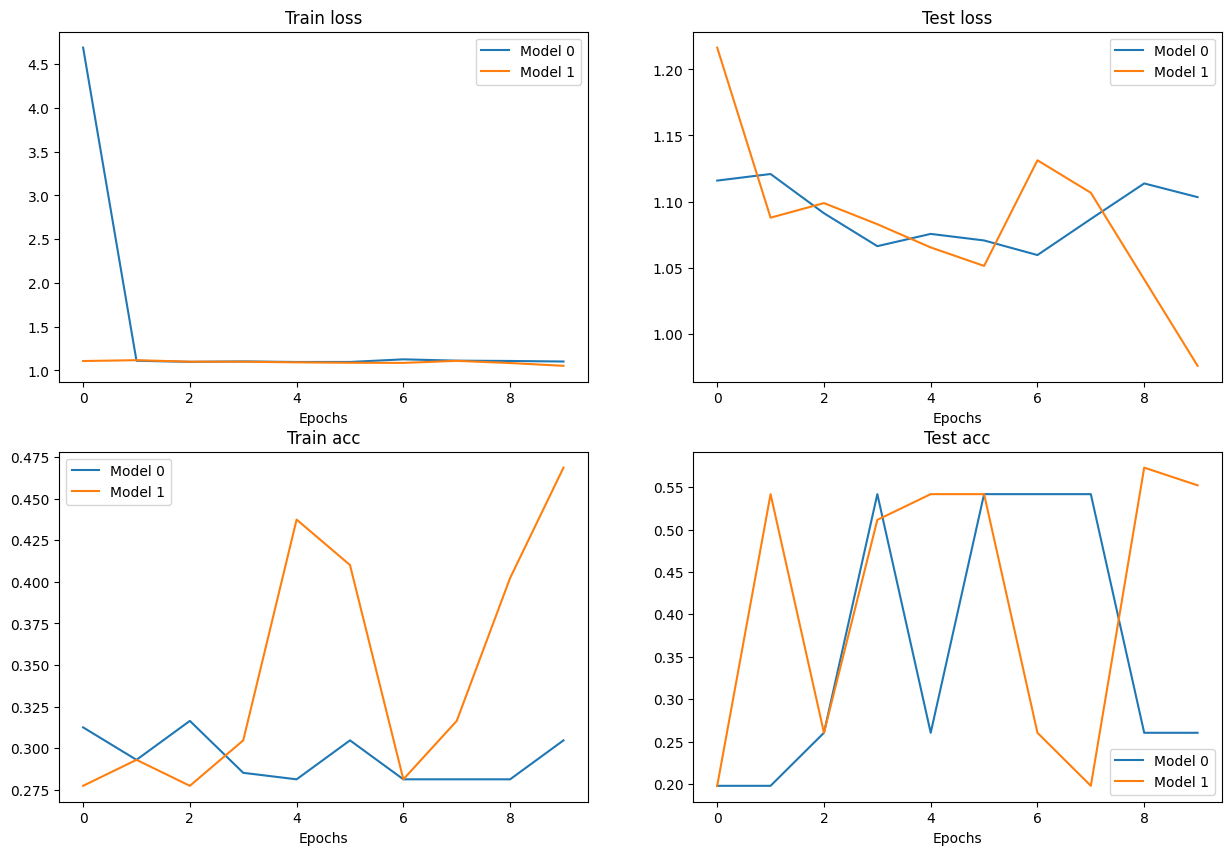

In [82]:
## Setup plot
plt.figure(figsize=(15,10))

#get numbers of epochs
epochs = range(len(model_1_df))

#plot the train plot:
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df['train_loss'], label='Model 0')
plt.plot(epochs, model_1_df['train_loss'], label='Model 1')
plt.title('Train loss')
plt.xlabel('Epochs')
plt.legend()

#plot the test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df['test_loss'], label='Model 0')
plt.plot(epochs, model_1_df['test_loss'], label='Model 1')
plt.title('Test loss')
plt.xlabel('Epochs')
plt.legend()

#plot the train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df['train_acc'],label ='Model 0')
plt.plot(epochs, model_1_df['train_acc'], label='Model 1')
plt.title('Train acc')
plt.xlabel('Epochs')
plt.legend()

#plot the test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df['test_acc'], label = 'Model 0')
plt.plot(epochs, model_1_df['test_acc'], label = 'Model 1')
plt.title('Test acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

## 11. Make a prediction on a custom image

Using the trained model to make prediction of a image not in both train dataset and test dataset

### 11.1 Loading in a custom image with Pytorch

We have to make sure our custom image is in the same format as the data our model was trainned on
* In tensor form with data types (torch.float32)
* Shape (64,64,3)
* On the right device

We can read image into Pytorch with `torchvision.io.read_iamge()`

In [83]:
import torchvision
from pathlib import Path
custom_img_folder = Path('outside_data')
custom_img_path = custom_img_folder/'custom_sushi1.jpg'
#read custom image
custom_img_unit8 = torchvision.io.read_image(str(custom_img_path))
custom_img_unit8

tensor([[[113, 111, 108,  ..., 124,  84,  84],
         [113, 111, 109,  ..., 124,  92,  92],
         [112, 111, 109,  ..., 126, 102, 102],
         ...,
         [142, 113, 205,  ..., 155, 164, 164],
         [137, 144, 179,  ..., 204, 198, 198],
         [123, 197, 122,  ..., 183, 190, 190]],

        [[ 63,  62,  61,  ...,  89,  78,  78],
         [ 63,  62,  62,  ...,  91,  86,  86],
         [ 63,  62,  62,  ...,  96,  96,  96],
         ...,
         [142, 112, 202,  ..., 156, 174, 174],
         [136, 141, 174,  ..., 205, 209, 209],
         [120, 192, 115,  ..., 183, 200, 200]],

        [[ 54,  55,  55,  ...,  96,  82,  82],
         [ 54,  55,  56,  ...,  98,  90,  90],
         [ 56,  55,  56,  ..., 106, 100, 100],
         ...,
         [150, 120, 209,  ..., 161, 183, 183],
         [144, 150, 181,  ..., 207, 213, 213],
         [129, 199, 123,  ..., 181, 202, 202]]], dtype=torch.uint8)

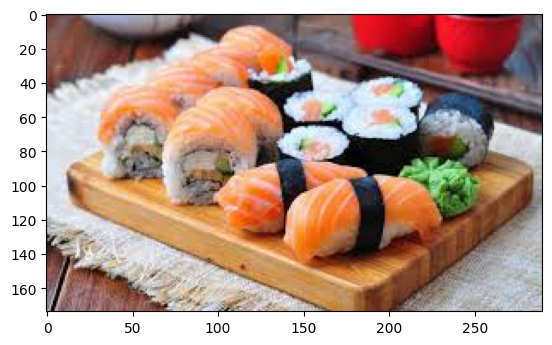

In [84]:
plt.imshow(custom_img_unit8.permute(1,2,0))

### 11.2 Write a function to make predict

Note, to make a predition on a custom image we had to:
* Load the image and turn into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data of the model was trained on (3,64,64) with a batchsize (1,3,64,64)
* Make sure the image was on the same device with the model

In [119]:
def make_predict(model,
                transform,
                class_names,
                image_path,
                device,
                plot_image = False):
    """Load an image and making prediction with that image"""
    #load the image
    raw_img = torchvision.io.read_image(image_path).type(torch.float32)
    #normalize the raw image
    raw_img = raw_img/ 255.
    
    if transform:
        #transform the image
        transformed_img = transform(raw_img)
    
    #set the image and model to the right device
    transformed_img = transformed_img.to(device)
    model = model.to(device)
    
    model.eval()
    with torch.inference_mode():
        #make the prediction
        pred_logit = model(transformed_img.unsqueeze(dim = 0)) #adding the batch dimension to the image
        pred_probs = torch.softmax(pred_logit, dim = 1) #change the logit to the probabilities

        #get the class of the predict
        if class_names:
            pred_class = class_names[pred_probs.argmax(dim = 1).cpu()]
        else:
            pred_class = pred_probs.argmax(dim = 1).cpu()
        
    if plot_image:
        plt.title(f"Class: {pred_class} | Prob: {max(pred_probs.cpu()[0]):.3f}")
        plt.imshow(transformed_img.permute(1,2,0).cpu())
        plt.axis("off")

In [120]:
simple_transform = transforms.Compose([
    transforms.Resize((64,64))
])

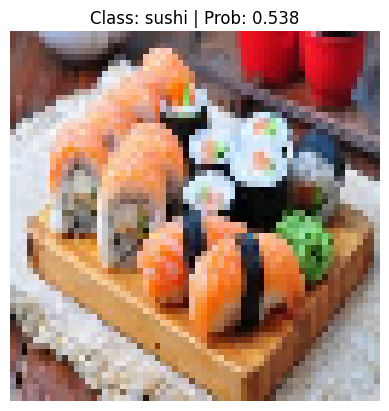

In [121]:
make_predict(model = model_1,
            transform = simple_transform,
            class_names = class_names,
            image_path = str(custom_img_path),
            device = device,
            plot_image=True)